## FAKE REVIEW DETECTION MODEL

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

## data visualisation

In [6]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [7]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [9]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

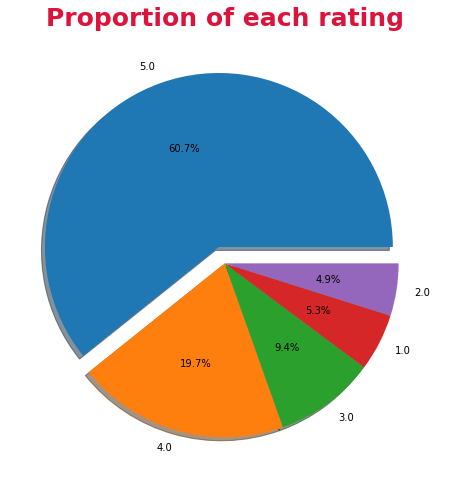

In [11]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

## CLEANING OF DATA

In [12]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [13]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [14]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [15]:
df.shape

(40432, 4)

In [16]:
df['text_'] = df['text_'].astype(str)

In [17]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])


In [18]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [19]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [20]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [21]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [22]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [23]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [24]:
df['text_'] = df['text_'].str.lower()

In [25]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [26]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [27]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## data visualisation

In [33]:

df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [34]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [35]:
df.dropna(inplace=True)

In [36]:
df['length'] = df['text_'].apply(len)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


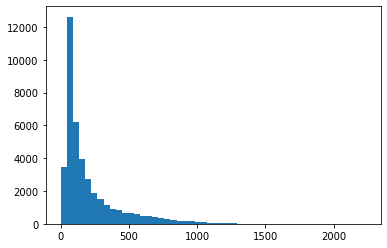

In [38]:
plt.hist(df['length'],bins=50)
plt.show()

In [39]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     173.630441  173.955236  0.0  57.0   99.0  217.0  1300.0  
OR     237.893599  252.920950  8.0  74.0  134.0  296.0  2232.0

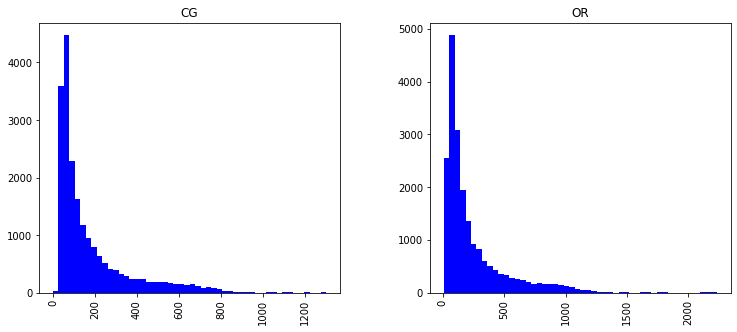

In [40]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [41]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [42]:
df.length.describe()

count    40432.00000
mean       205.76202
std        219.42200
min          0.00000
25%         64.00000
50%        116.00000
75%        253.00000
max       2232.00000
Name: length, dtype: float64

## CREATION OF BAG OF WORDS MODEL

##METHOD1

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
TV=TfidfVectorizer()

In [31]:
TVreviews=TV.fit_transform(df['text_'])

In [32]:
print(TVreviews)

  (0, 20428)	0.38992350758784106
  (0, 27878)	0.3879500266966662
  (0, 6229)	0.37178682074453273
  (0, 25164)	0.4211248185108301
  (0, 16116)	0.346763166014249
  (0, 28500)	0.2614556870102944
  (0, 15874)	0.4396352040011048
  (1, 29249)	0.270144632916254
  (1, 6740)	0.32990247651838367
  (1, 17022)	0.4608129673846304
  (1, 27817)	0.289297787760185
  (1, 18732)	0.4126576748018293
  (1, 27613)	0.5354550039816273
  (1, 11814)	0.1801569407223439
  (1, 15874)	0.18080235404596745
  (2, 10094)	0.2461471490918857
  (2, 15793)	0.19431690659734346
  (2, 3098)	0.25463631979044116
  (2, 22730)	0.3575406088039986
  (2, 19782)	0.8153752163725261
  (2, 26155)	0.1530904301333542
  (2, 15874)	0.14388938540095017
  (3, 20449)	0.3595011895827562
  (3, 20554)	0.3379591316572533
  (3, 27674)	0.2652205734602192
  :	:
  (40431, 28968)	0.10767169435888933
  (40431, 26359)	0.05766832335119592
  (40431, 25413)	0.03781913621295946
  (40431, 10339)	0.03261607653705127
  (40431, 21356)	0.03995213470777442
  (40431

In [33]:
print("Shape:",TVreviews.shape)

Shape: (40432, 29493)


In [34]:
x1 = TVreviews
y1 = df['label']

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
import pickle
bow_path = './gdrive/My Drive/Colab Notebooks/3.1 Fake_Detection_Bag Model.pkl'
pickle.dump(TV,open(bow_path,"wb"))

In [37]:
review_train1, review_test1, label_train1, label_test1 = train_test_split(x1,y1,test_size=0.30)

##METHOD2

In [48]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [49]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f93a80dcb80>)

In [50]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

KeyboardInterrupt: ignored

In [ ]:
review4 = df['text_'][3]
review4

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

In [ ]:
bow_reviews = bow_transformer.transform(df['text_'])

In [ ]:
print(bow_reviews)

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

In [ ]:
x1 = tfidf_reviews
y1 = df['label']

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(x1,y1,test_size=0.30)

## support vector machine

In [38]:
pipeline1 = SVC()


In [39]:
pipeline1.fit(review_train1,label_train1)

SVC()

In [40]:
svc_pred = pipeline1.predict(review_test1)
svc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'OR', 'OR'], dtype=object)

In [41]:
print('Classification Report:',classification_report(label_test1,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test1,svc_pred))
print('Accuracy Score:',accuracy_score(label_test1,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test1,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.91      0.87      0.89      6049
          OR       0.88      0.91      0.90      6081

    accuracy                           0.89     12130
   macro avg       0.89      0.89      0.89     12130
weighted avg       0.89      0.89      0.89     12130

Confusion Matrix: [[5286  763]
 [ 528 5553]]
Accuracy Score: 0.8935696619950536
Model Prediction Accuracy: 89.36%


In [42]:
import joblib
joblib.dump(pipeline1,'./gdrive/My Drive/Colab Notebooks/3.2 Detection Model')

['./gdrive/My Drive/Colab Notebooks/3.2 Detection Model']

##  Multinomial Naive Bayes

In [ ]:
pipeline2 = MultinomialNB()


In [ ]:
pipeline2.fit(review_train,label_train)

MultinomialNB()

In [ ]:
predictions = pipeline2.predict(review_test)
predictions

array(['CG', 'CG', 'OR', ..., 'OR', 'CG', 'CG'], dtype='<U2')

In [ ]:

print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      6100
          OR       0.87      0.81      0.84      6030

    accuracy                           0.85     12130
   macro avg       0.85      0.85      0.85     12130
weighted avg       0.85      0.85      0.85     12130

Confusion Matrix: [[5398  702]
 [1158 4872]]
Accuracy Score: 0.8466611706512778


In [ ]:

print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.67%


## RANDOM FOREST CLASSIFIER

In [ ]:
pipeline3 = RandomForestClassifier()

In [ ]:
pipeline3.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7504dfae60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline3.predict(review_test)
rfc_pred

array(['CG', 'OR', 'OR', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:

print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      6100
          OR       0.87      0.80      0.83      6030

    accuracy                           0.84     12130
   macro avg       0.85      0.84      0.84     12130
weighted avg       0.84      0.84      0.84     12130

Confusion Matrix: [[5398  702]
 [1208 4822]]
Accuracy Score: 0.8425391591096455
Model Prediction Accuracy: 84.25%


## DECISION TREE CLASSIFIER

In [ ]:
pipeline4 = DecisionTreeClassifier()

In [ ]:
pipeline4.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7504dfae60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline4.predict(review_test)
dtree_pred

array(['CG', 'OR', 'OR', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.72      0.74      0.73      6100
          OR       0.73      0.70      0.72      6030

    accuracy                           0.72     12130
   macro avg       0.72      0.72      0.72     12130
weighted avg       0.72      0.72      0.72     12130

Confusion Matrix: [[4535 1565]
 [1792 4238]]
Accuracy Score: 0.7232481450948063
Model Prediction Accuracy: 72.32%


## KNN CLASSIFIER

In [ ]:
pipeline5 = KNeighborsClassifier(n_neighbors=2)


In [ ]:
pipeline5.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7504dfae60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline5.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.50      0.99      0.67      6100
          OR       0.53      0.01      0.01      6030

    accuracy                           0.50     12130
   macro avg       0.52      0.50      0.34     12130
weighted avg       0.52      0.50      0.34     12130

Confusion Matrix: [[6068   32]
 [5994   36]]
Accuracy Score: 0.5032151690024732
Model Prediction Accuracy: 50.32%


## LOGISTIC REGRESSION

In [ ]:
pipeline6 = LogisticRegression()


In [ ]:
pipeline6.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7504dfae60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline6.predict(review_test)
lr_pred

array(['CG', 'OR', 'OR', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:

print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      6100
          OR       0.85      0.87      0.86      6030

    accuracy                           0.86     12130
   macro avg       0.86      0.86      0.86     12130
weighted avg       0.86      0.86      0.86     12130

Confusion Matrix: [[5181  919]
 [ 758 5272]]
Accuracy Score: 0.8617477328936521
Model Prediction Accuracy: 86.17%


## MULTILAYER PERCEPTRON MODEL

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
pipeline7 = MLPClassifier(hidden_layer_sizes=(10))
pipeline7.fit(review_train1,label_train1)

MLPClassifier(hidden_layer_sizes=10)

In [ ]:
mlp_pred = pipeline7.predict(review_test1)
mlp_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'OR', 'OR'], dtype='<U2')

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test1,mlp_pred)*100,2)) + '%')

Model Prediction Accuracy: 82.69%


## ACCURACY OF VARIOUS MODELS

In [ ]:
print('Performance of various ML models:')
print('\n')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')
print('MULTILAYER PERCEPTRON MODEL Prediction Accuracy:',str(np.round(accuracy_score(label_test,mlp_pred)*100,2)) + '%')

## SENTIMENT ANALYSIS MODEL

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [45]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [47]:
df2 = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [48]:
df2['Review'] = df2['Review'].astype(str)

In [49]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])


In [50]:
df2['Review'][:len (df2.index)] = df2['Review'][:len (df2.index)].apply(preprocess)

In [51]:
df2['Review'] = df2['Review'].str.lower()

In [52]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df2['Review'] = df2['Review'].apply(lambda x: stem_words(x))

In [53]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df2["Review"] = df2["Review"].apply(lambda text: lemmatize_words(text))

In [54]:
df2.dropna(inplace=True)

##CREATION OF BAG OF WORDS


##METHOD1

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
TV1=TfidfVectorizer()

In [57]:
TVreviews1=TV1.fit_transform(df2['Review'])

In [58]:
x2 = TVreviews1
y2= df2.iloc[:,-1].values

In [59]:
review_train2, review_test2, label_train2, label_test2 = train_test_split(x2,y2,test_size=0.30)

In [60]:
import pickle
bow_path = './gdrive/My Drive/Colab Notebooks/4.1 Sentiment_Bag Model.pkl'
pickle.dump(TV1,open(bow_path,"wb"))

##METHOD2

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer1 = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f4dc0bf3290>)

In [ ]:
bow_transformer1.fit(df2['Review'])
print("Total Vocabulary:",len(bow_transformer1.vocabulary_))

Total Vocabulary: 1587


In [ ]:
bow_reviews1 = bow_transformer1.transform(df2['Review'])

In [ ]:
tfidf_transformer1 = TfidfTransformer().fit(bow_reviews1)

In [ ]:
tfidf_reviews1 = tfidf_transformer1.transform(bow_reviews1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features = 1000)
x= tfidf_reviews1.toarray()
y= df2.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

## TESTING VARIOUS CLASSIFICATION MODELS

##Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
rfc_pred = classifier1.predict(x_test)
rfc_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%')

Model Prediction Accuracy: 74.0%


##support vector machine

In [61]:
classifier2 = SVC()

In [62]:
classifier2.fit(review_train2,label_train2)

SVC()

In [63]:
svc_pred = classifier2.predict(review_test2)
svc_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [64]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test2,svc_pred)*100,2)) + '%')

Model Prediction Accuracy: 77.33%


In [65]:
import joblib
joblib.dump(classifier2,'./gdrive/My Drive/Colab Notebooks/4.2 Sentiment Model')

['./gdrive/My Drive/Colab Notebooks/4.2 Sentiment Model']

##Multinomial Naive Bayes

In [ ]:
classifier3 = MultinomialNB()

In [ ]:
classifier3.fit(x_train,y_train)

MultinomialNB()

In [ ]:
mnb_pred= classifier3.predict(x_test)
mnb_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,mnb_pred)*100,2)) + '%')

Model Prediction Accuracy: 74.0%


DECISION TREE CLASSIFIER

In [ ]:
classifier4 = DecisionTreeClassifier()

In [ ]:
classifier4.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred=classifier4.predict(x_test)
dtc_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,dtc_pred)*100,2)) + '%')

Model Prediction Accuracy: 74.0%


KNN CLASSIFIER

In [ ]:
classifier5 = KNeighborsClassifier(n_neighbors=2)

In [ ]:
classifier5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_pred=classifier5.predict(x_test)
knn_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,knn_pred)*100,2)) + '%')

Model Prediction Accuracy: 73.5%


LOGISTIC REGRESSION

In [ ]:
classifier6= LogisticRegression()

In [ ]:
classifier6.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_pred=classifier6.predict(x_test)
lr_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')

Model Prediction Accuracy: 75.5%


In [ ]:
print('Performance of various ML models:')
print('\n')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(y_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(y_test,dtc_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(y_test,mnb_pred)*100,2)) + '%')

Performance of various ML models:


Support Vector Machines Prediction Accuracy: 76.0%
Logistic Regression Prediction Accuracy: 75.5%
K Nearest Neighbors Prediction Accuracy: 73.5%
Decision Tree Classifier Prediction Accuracy: 74.0%
Random Forests Classifier Prediction Accuracy: 74.0%
Multinomial Naive Bayes Prediction Accuracy: 74.0%


## FAKE REVIEW PREDICTION USING SUPPORT VECTOR MACHINE AND SENTMENT ANALYSIS USING SUPPORT VECTOR MACHINE

In [ ]:
df3 = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [ ]:
df3['Review'] = df3['Review'].astype(str)

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])


In [ ]:
df3['Review'][:len (df3.index)] = df3['Review'][:len (df3.index)].apply(preprocess)

In [ ]:
df3['Review'] = df3['Review'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df3['Review'] = df3['Review'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df3["Review"] = df3["Review"].apply(lambda text: lemmatize_words(text))

In [ ]:
df3.dropna(inplace=True)

##CREATION OF BAG OF WORDS


##METHOD 1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
TV2 = TfidfVectorizer()

In [ ]:
TVreviews2=TV1.transform(df3['Review'])

##METHOD 2

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer2 = CountVectorizer(analyzer=text_process)
bow_transformer2

CountVectorizer(analyzer=<function text_process at 0x7f4dc032f0e0>)

In [ ]:
bow_transformer2.fit(df3['Review'])
print("Total Vocabulary:",len(bow_transformer2.vocabulary_))

Total Vocabulary: 1784


In [ ]:
bow_reviews2 = bow_transformer2.transform(df3['Review'])

In [ ]:
print(bow_reviews2)

  (0, 913)	1
  (0, 1164)	1
  (0, 1765)	1
  (1, 363)	1
  (1, 671)	1
  (2, 1023)	1
  (2, 1561)	1
  (2, 1573)	1
  (3, 112)	1
  (3, 753)	1
  (3, 863)	1
  (3, 913)	1
  (3, 952)	1
  (3, 1272)	1
  (3, 1314)	1
  (3, 1495)	1
  (3, 1503)	1
  (4, 684)	1
  (4, 971)	1
  (4, 1203)	1
  (4, 1380)	1
  (5, 45)	1
  (5, 374)	1
  (5, 653)	1
  (5, 1152)	1
  :	:
  (997, 664)	1
  (997, 796)	1
  (997, 1093)	1
  (997, 1763)	1
  (998, 538)	1
  (998, 664)	1
  (998, 1035)	1
  (998, 1040)	1
  (998, 1543)	1
  (998, 1581)	1
  (998, 1595)	1
  (998, 1651)	1
  (998, 1738)	1
  (999, 190)	1
  (999, 259)	1
  (999, 459)	1
  (999, 509)	1
  (999, 883)	1
  (999, 1050)	1
  (999, 1194)	1
  (999, 1345)	1
  (999, 1595)	1
  (999, 1609)	1
  (999, 1715)	1
  (999, 1764)	1


In [ ]:
tfidf_transformer2 = TfidfTransformer().fit(bow_reviews2)

In [ ]:
tfidf_reviews2 = tfidf_transformer2.transform(bow_reviews2)

In [ ]:
tfidf_reviews2

<1000x1784 sparse matrix of type '<class 'numpy.float64'>'
	with 5484 stored elements in Compressed Sparse Row format>

##PREDICTION USING SVC

In [ ]:
df3.head()

,Review,Liked
0,wow ... love place,1
1,crust good,0
2,not tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,the select menu great price,1


In [ ]:
label = pipeline1.predict(TVreviews2)
 

ValueError: ignored

In [ ]:
df3['label'] = label

In [ ]:
df3.head()

,Review,Liked,label
0,wow ... loved place,1,OR
1,crust good,0,OR
2,not tasty texture nasty,0,OR
3,stopped late may bank holiday rick steve recom...,1,OR
4,the selection menu great price,1,OR


## Deletion of fake reviews 

In [ ]:
df4 = df3[df3.label !='CG']
df4.head()

,Review,Liked,label
0,wow ... loved place,1,OR
1,crust good,0,OR
2,not tasty texture nasty,0,OR
3,stopped late may bank holiday rick steve recom...,1,OR
4,the selection menu great price,1,OR


In [ ]:
df4.reset_index(inplace = True, drop = True)

In [ ]:
df4.shape

(997, 3)

## SENTIMENT ANALYSIS ON REMAINING REVIEWS AFTER DELETION

In [ ]:
TV4 = TfidfVectorizer()

In [ ]:
TVreviews3=TV4.transform(df4['Review'])

NotFittedError: ignored

In [ ]:
print(TVreviews3)

  (0, 1815)	0.7143496456861134
  (0, 1191)	0.35423774574049066
  (0, 939)	0.6035065891942025
  (1, 687)	0.4474629961880795
  (1, 376)	0.8943024471857307
  (2, 1605)	0.5453438717491121
  (2, 1593)	0.45344644792190564
  (2, 1072)	0.446750984283619
  (2, 1047)	0.5453438717491121
  (3, 1536)	0.3357789179399726
  (3, 1528)	0.355779478455777
  (3, 1342)	0.355779478455777
  (3, 1300)	0.3215882944206513
  (3, 977)	0.3015877339048469
  (3, 939)	0.2716885993611421
  (3, 887)	0.3357789179399726
  (3, 772)	0.355779478455777
  (3, 120)	0.355779478455777
  (4, 1610)	0.26889285965009563
  (4, 1409)	0.5362140942916989
  (4, 1230)	0.49610668659502705
  (4, 996)	0.5077574356640739
  (4, 701)	0.3690956747994678
  (5, 1752)	0.34715494698424604
  (5, 1179)	0.3980583336407182
  :	:
  (994, 680)	0.38044017565639604
  (994, 111)	0.35220605381295056
  (995, 1787)	0.3814538230546854
  (995, 1692)	0.3814538230546854
  (995, 1636)	0.21948518466447536
  (995, 1620)	0.2842514578835246
  (995, 1610)	0.15232998199403

In [ ]:
sentiment = classifier2.predict(TVreviews4)

ValueError: ignored

In [ ]:
sentiment